In [1]:
import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print(images_train.shape)
print(cls_train.shape)
print(labels_train.shape)

(50000, 32, 32, 3)
(50000,)
(50000, 10)


In [7]:
images_train_reshaped = images_train.reshape((50000,32*32*3))
images_train_reshaped.shape

(50000, 3072)

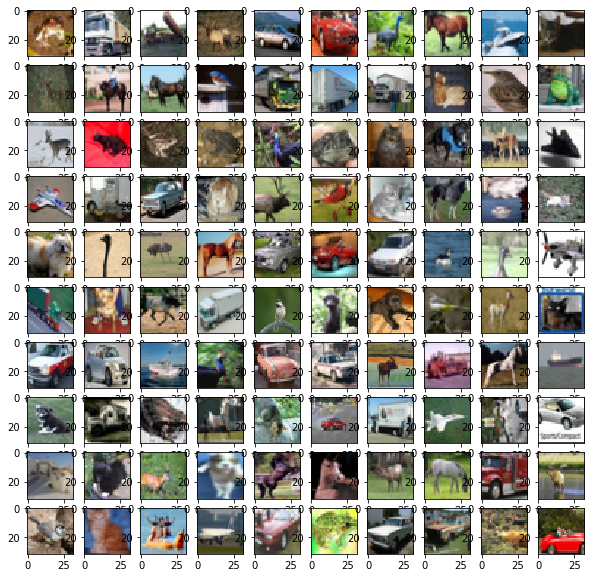

In [8]:
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i])
plt.show()

In [ ]:
pca = PCA()
pca.fit(images_train_reshaped)

In [ ]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total<0.99:
    currentSum += pca.explained_variance_[k]
    k+=1
k

In [ ]:
pca = PCA(n_components=k)
images_train_transformed = pca.fit_transform(images_train_reshaped)
images_train_transformed.shape

In [ ]:
images_approx = pca.inverse_transform(images_train_transformed)
images_approx = images_approx.reshape((50000,32,32,3))
images_approx.shape

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(images_approx[i])
plt.show()

In [ ]:
images_test_reshaped = images_test.reshape((10000,32*32*3))
images_test_reshaped.shape

In [ ]:
images_test_transformed = pca.transform(images_test_reshaped)
images_test_transformed.shape

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(images_train_transformed,cls_train)
cls_pred = rf_clf.predict(images_test_transformed)
print(classification_report(cls_test,cls_pred))

In [ ]:
clf = SVC()
grid={'C':[1e2,1e4,1e1,5e3,1e3,5e2],
      'gamma':[1e-3,1e-2,5e-3,5e-2,1e-4,1e-5]}

svm = GridSearchCV(clf,grid, n_jobs=-1)

svm.fit(images_train_transformed,cls_train)

y_pred = svm.predict(images_test_transformed)

print(svm.score(cls_test,y_pred))

In [ ]:
predictions = []
for i in range(len(cls_pred)):
    predictions.append(class_names[cls_pred[i]])
predictions

In [ ]:
np.savetxt("predictions.csv", predictions, delimiter=',', fmt="%s")